In [11]:
import pandas as pd

df = pd.read_csv('../data/cln_rotten__full_genres_expl.csv')
df.head()

,rotten_tomatoes_link,movie_title,content_rating,genres,directors,authors,actors,runtime,production_company,tomatometer_status,...,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_name,top_critic,publisher_name,review_type,review_score,review_date
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,['Chris Columbus'],"['Craig Titley', ' Chris Columbus', ' Rick Rio...","['Logan Lerman', ' Brandon T. Jackson', ' Alex...",119.0,20th Century Fox,Rotten,...,254421.0,43,73,76,Andrew L. Urban,0.0,Urban Cinefile,Fresh,0.541766,2010-02-06
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,Comedy,['Chris Columbus'],"['Craig Titley', ' Chris Columbus', ' Rick Rio...","['Logan Lerman', ' Brandon T. Jackson', ' Alex...",119.0,20th Century Fox,Rotten,...,254421.0,43,73,76,Andrew L. Urban,0.0,Urban Cinefile,Fresh,0.541766,2010-02-06
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,Drama,['Chris Columbus'],"['Craig Titley', ' Chris Columbus', ' Rick Rio...","['Logan Lerman', ' Brandon T. Jackson', ' Alex...",119.0,20th Century Fox,Rotten,...,254421.0,43,73,76,Andrew L. Urban,0.0,Urban Cinefile,Fresh,0.541766,2010-02-06
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,Science Fiction & Fantasy,['Chris Columbus'],"['Craig Titley', ' Chris Columbus', ' Rick Rio...","['Logan Lerman', ' Brandon T. Jackson', ' Alex...",119.0,20th Century Fox,Rotten,...,254421.0,43,73,76,Andrew L. Urban,0.0,Urban Cinefile,Fresh,0.541766,2010-02-06
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,['Chris Columbus'],"['Craig Titley', ' Chris Columbus', ' Rick Rio...","['Logan Lerman', ' Brandon T. Jackson', ' Alex...",119.0,20th Century Fox,Rotten,...,254421.0,43,73,76,Louise Keller,0.0,Urban Cinefile,Fresh,0.541766,2010-02-06


In [12]:
df.shape

(2369208, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369208 entries, 0 to 2369207
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   rotten_tomatoes_link              object 
 1   movie_title                       object 
 2   content_rating                    object 
 3   genres                            object 
 4   directors                         object 
 5   authors                           object 
 6   actors                            object 
 7   runtime                           float64
 8   production_company                object 
 9   tomatometer_status                object 
 10  tomatometer_rating                float64
 11  tomatometer_count                 float64
 12  audience_status                   object 
 13  audience_rating                   float64
 14  audience_count                    float64
 15  tomatometer_top_critics_count     int64  
 16  tomatometer_fresh_critics_count   in

In [14]:
df.isna().sum()

rotten_tomatoes_link                  0
movie_title                           0
content_rating                        0
genres                              245
directors                             0
authors                               0
actors                                0
runtime                               0
production_company                    0
tomatometer_status                    0
tomatometer_rating                    0
tomatometer_count                     0
audience_status                       0
audience_rating                       0
audience_count                        0
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_rotten_critics_count      0
critic_name                          50
top_critic                           50
publisher_name                       50
review_type                          50
review_score                         50
review_date                          50
dtype: int64

In [18]:
df.dropna(inplace = True)
df.isna().sum()

rotten_tomatoes_link                0
movie_title                         0
content_rating                      0
genres                              0
directors                           0
authors                             0
actors                              0
runtime                             0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                     0
audience_rating                     0
audience_count                      0
tomatometer_top_critics_count       0
tomatometer_fresh_critics_count     0
tomatometer_rotten_critics_count    0
critic_name                         0
top_critic                          0
publisher_name                      0
review_type                         0
review_score                        0
review_date                         0
dtype: int64

In [20]:
df['genres'] = df['genres'].map(lambda x: x.strip())

In [27]:
df_g_sc = df.groupby('genres')['review_score'].mean()
df_g_sc

genres
Action & Adventure           0.617021
Animation                    0.680951
Anime & Manga                0.707836
Art House & International    0.707372
Classics                     0.760596
Comedy                       0.615046
Cult Movies                  0.656172
Documentary                  0.733293
Drama                        0.676963
Faith & Spirituality         0.632066
Gay & Lesbian                0.681958
Horror                       0.580764
Kids & Family                0.629104
Musical & Performing Arts    0.674689
Mystery & Suspense           0.624114
Romance                      0.636357
Science Fiction & Fantasy    0.638000
Special Interest             0.720334
Sports & Fitness             0.681049
Television                   0.680728
Western                      0.671530
Name: review_score, dtype: float64

In [31]:
df_g_sc.index = df_g_sc.index.map(lambda x: x.replace(' ','\n'))

<AxesSubplot:xlabel='genres'>

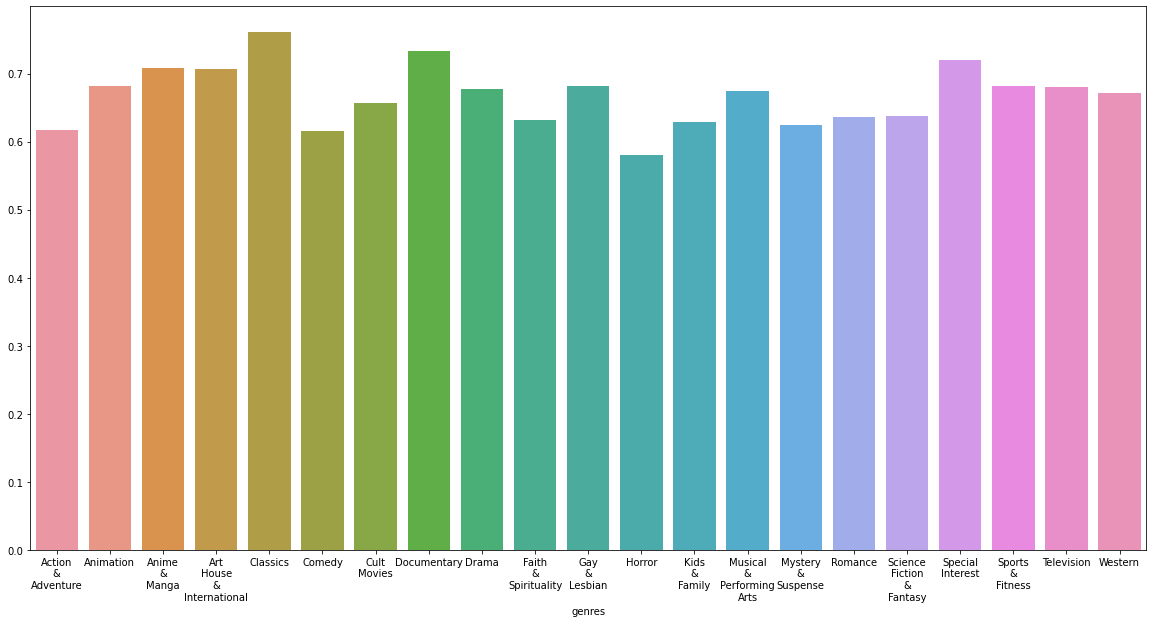

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x = df_g_sc.index, y = df_g_sc.values)